___
# HW #4

____



### Name: 
Aditya Jain

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data! 

✍🏻 For this problem, do not use a library to compute the KDE - do it yourself using basic Python. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not? 
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _pt_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,pt) = \exp(-(x - pt)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will look like a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible? 
* finally, answer the question: do you think this is a normal distribution? would you arrive at a different conclusion depending on which width _w_ you pick? 



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


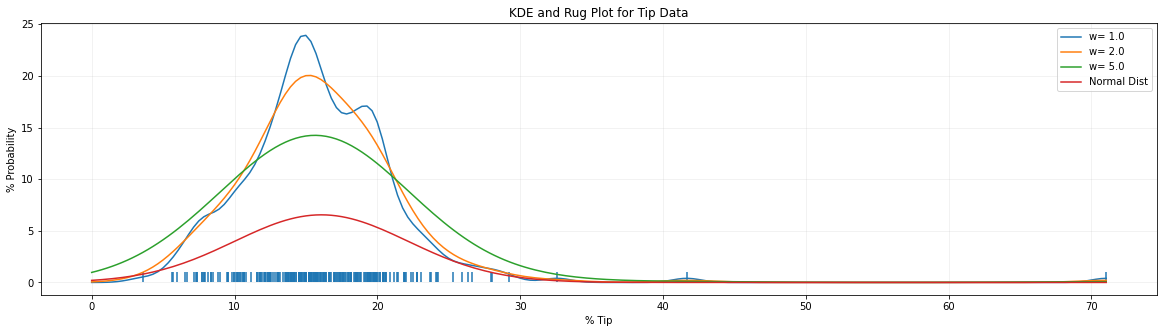

In [1]:
from cProfile import label
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset("tips") 
tip_perc = np.array((df["tip"]/df["total_bill"])*100) # Creating new array containing values of tip percentage 

plt.figure(figsize=(20, 5)) 
plt.vlines(tip_perc, 0, 1) # Using vlines to plot all the values for tip_percentage across the gamut (will be used as rug plot) 

# Answer
# The graph of lines seem to be clustered between range 10-20 % of tip. 
# The points on the right of range 10-20 % are more streched and spread as compared to the left side, indicating skewness 

def my_kde(x_vals, tips, width): 
  
  kde = np.zeros(len(x_vals)) # Creating zero value array of length equal to x_valus to store values for x_vals 

  for tip in tips:  

    kde += np.exp(-(x_vals - tip)**2/(2*width**2)) / (np.sqrt(2*np.pi)*width) # Summing the kde's for all percentages into kde variable and returning an array 

  return kde 

x_vals = np.linspace(0, max(tip_perc), 200) # Linspace creates equal space buckets between the min/max value provided in the input

# W = 2 is the best value to plot the KDE because it best matches the normal distribution density curve
# When w is too large like infinity the curve flattens out and becomes completely smooth and centered to mean of the samples. 

# plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label=("w= 0.5")) # Trying plots with different width values
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label=("w= 1.0"))
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label=("w= 2.0"))
plt.plot(x_vals, my_kde(x_vals, tip_perc, 5.0), label=("w= 5.0"))
# plt.plot(x_vals, my_kde(x_vals, tip_perc, 10.0), label=("w= 10.0"))
# plt.plot(x_vals, my_kde(x_vals, tip_perc, 20.0), label=("w= 20.0"))
# plt.plot(x_vals, my_kde(x_vals, tip_perc, 20.0), label= ("w= 2000.0")) 

plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2
                            / (2*np.var(tip_perc))) 
                            / (np.std(tip_perc)*np.sqrt(2*np.pi)),
                              label=("Normal Dist")
 ) # Plotting normal distribution from mean and standard deviation values of tip percentages

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% Tip")
plt.ylabel("% Probability")
plt.legend()

✏️ **Answer 1**:
* Normal distribution or not? 
    * The distribution is close to a normal distribution but there is slight left skewness in the curve.   

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### choosing a topic for your project

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project. 

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story. 

Your project should be on a topic of interest to you. You will not be motivated to find a story if you are not interested in the topic. What you should be thinking about are topics that you want to work on: I won't suggest a topic to you. The topic can be something you already know about or something you want to learn about. For example, if you are an RA, you might choose to use data from that project. Or, if you want to learn more about American football, this project can be a way to do that. 

There are tradeoffs between choosing something you already know, because you might learn less than choosing something new, and choosing something you don't know about, because you might get less out of it. In the end, it's your choice - make a good one! 

If you want to build your own dataset, this is the time to start doing that. For this HW, you don't need to have your new dataset in hand, but enough that you can answer the questions. (Or, you might just use datasets prepared for you at [UCI](https://archive.ics.uci.edu/ml/index.php), `sklearn`, `Seaborn`, and so on.....) 

✍🏻 In a markdown cell below, answer these questions:
* name two topics that you are familiar with now, with a few sentence of what they are and why they are interesting to you,
* do the same for two topics you wish to learn about,
* for all four of these topics, search the internet to see if you can find a dataset that you could use for that topic: are there good datasets for each topic? are there multiple datasets for each? 
* perform some very simple EDA on $4$ datasets, (put plots here; or, if there are plots on the internet already, simply cite the ones you used),
* based on what you see for these $4$, rank them according to which has the most likely success, in terms of an interesting narrative, versus least likely. 

If there are two topics that are nearly equal, you should consider using one of them for the second half of the semester. Or, if one topic is super interesting, you can use it for the machine learning project as well. 



✏️ **Answer 2**:
* Customer segmentation - It is very important for a business to understand the needs and interests of their customer. Segmenting and clustering them to run marketing and cashback schemes is an effective strategy. I am very much interested in finding patterns and clusters in the dataset and as every company has customers thus such type of anaysis are always good to have in portfolio. For sample EDA click [here](https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e)

* Netflix top movies and series - Unfortunate love for movies and series on OTT platforms has motivated me to explore daily top movies and series trending on netflix. I am interested because i would like to know if i have watched them all and how updated i am with the trends? For sample EDA click [here](https://www.kaggle.com/code/jasonmobley/netflix-and-success-what-do-the-people-want)  

* Environment and human interventions - I wish to explore environmental changes/disasters caused by human activities across a time frame. I would like to find out if there is any relation between recent increase in calamities like wildfire or floods with human interventions, i.e. are humans creating more trouble to environment than before? I am interested to know becuase i very much care about environment. For sample EDA click [here](https://www.buzzfeednews.com/article/peteraldhous/california-wildfires-people-climate)

* Influencers on social media - I wish to learn some features responsible in making an individiaual more influential on a social network platform like twitter, and calculate an influential score to rate and comapre between individuals. This is interesting to me because i very much like to understand how profiling and scoring of individuals are done and what would be a good strategy to follow to make any profile highly influencing. For sample EDA click here

* Ranking based on most likely to succeed - Influencers on social media >= Environment and human interventions > Customer Segmentation > Netflix Top movies and series

In [2]:
# Simple EDA for topic 4 Influencers on social media
import pandas as pd

df_inf = pd.read_csv("train.csv")
df_inf.head(10)

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,...,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333,4302.466667
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,...,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098,3865.446569
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,...,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033,5535.939774


In [3]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [4]:
df_inf.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


<AxesSubplot:>

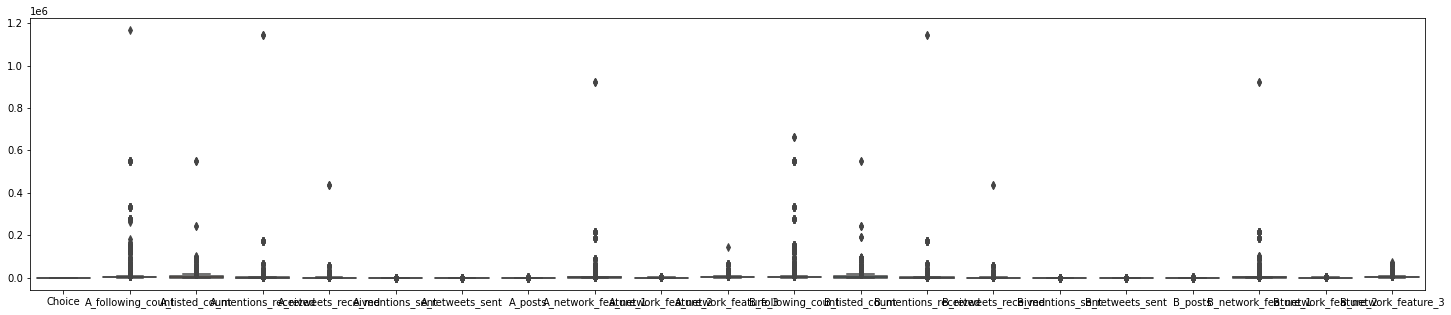

In [5]:
plt.figure(figsize=(25,5))
sns.boxplot(data = df_inf.drop(["A_follower_count", "B_follower_count"], axis= 1))

In [6]:
cm = sns.light_palette("green", as_cmap=True)

df_inf.corr().style.background_gradient(cmap=cm)

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
Choice,1.000000,0.134133,0.063678,0.135078,0.020745,0.024139,0.123868,0.137833,0.107648,0.065543,0.073995,0.084508,-0.161278,-0.042859,-0.191179,-0.062332,-0.064774,-0.139521,-0.168341,-0.102028,-0.108259,-0.051364,-0.069339
A_follower_count,0.134133,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082,0.155347,0.033327,0.140186,0.029233,0.030709,-0.011715,-0.010649,-0.013452,0.051651,-0.033974,-0.014107
A_following_count,0.063678,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762,-0.007616,-0.010944,-0.011792,0.001077,-0.001774,0.006797,0.002244,-0.000280,-0.002475,0.003415,-0.003968
A_listed_count,0.135078,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574,0.211085,0.048962,0.203068,0.045555,0.045333,-0.002835,0.006040,0.003535,0.068414,-0.034576,-0.010478
A_mentions_received,0.020745,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079,0.146134,0.023431,0.136128,0.010900,0.008098,-0.008721,-0.012288,-0.011123,0.023156,-0.017576,-0.011153
A_retweets_received,0.024139,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301,0.149532,0.023340,0.139695,0.011525,0.008719,-0.007203,-0.012692,-0.009671,0.023931,-0.017675,-0.012855
A_mentions_sent,0.123868,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437,-0.005732,0.027851,0.005401,0.006467,0.010684,0.016772,0.003553,0.019061,0.005172,0.016377,0.014035
A_retweets_sent,0.137833,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127,0.024915,0.016303,0.038314,0.057745,0.060162,0.029084,0.011914,0.039341,0.050733,-0.004573,0.005986
A_posts,0.107648,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347,-0.011992,0.021679,-0.005321,0.001848,0.005974,0.028039,0.002118,0.023880,-0.001924,0.010813,0.004692
A_network_feature_1,0.065543,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711,0.138820,0.034620,0.127232,0.012452,0.011003,-0.002757,-0.012546,-0.010237,0.026392,-0.023533,-0.015348


C:\Users\Adi\AppData\Local\Temp\ipykernel_17764\2926667168.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_inf.hist(bins=30, ax=ax)


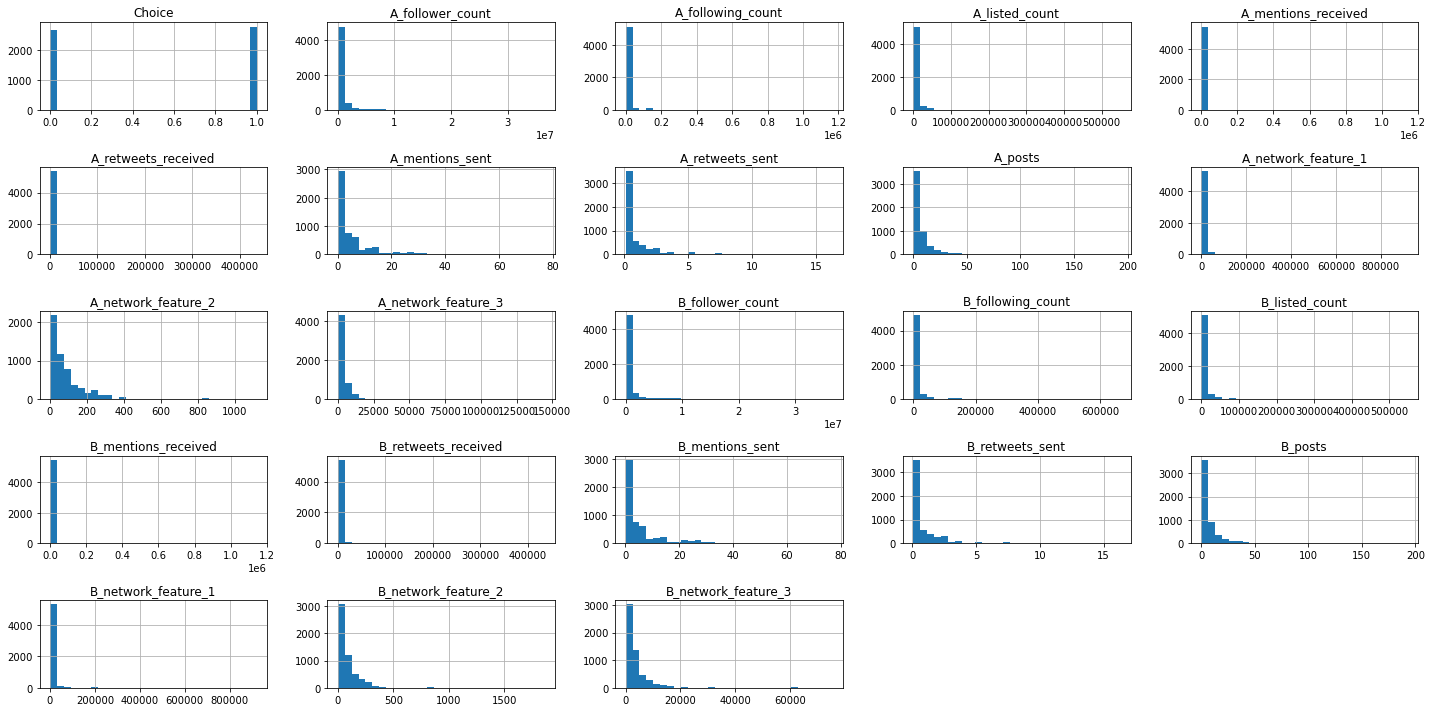

In [7]:
# histogram plot to understand distribution
fig = plt.figure(figsize=(20,10)); ax = fig.gca()
df_inf.hist(bins=30, ax=ax)
plt.tight_layout()

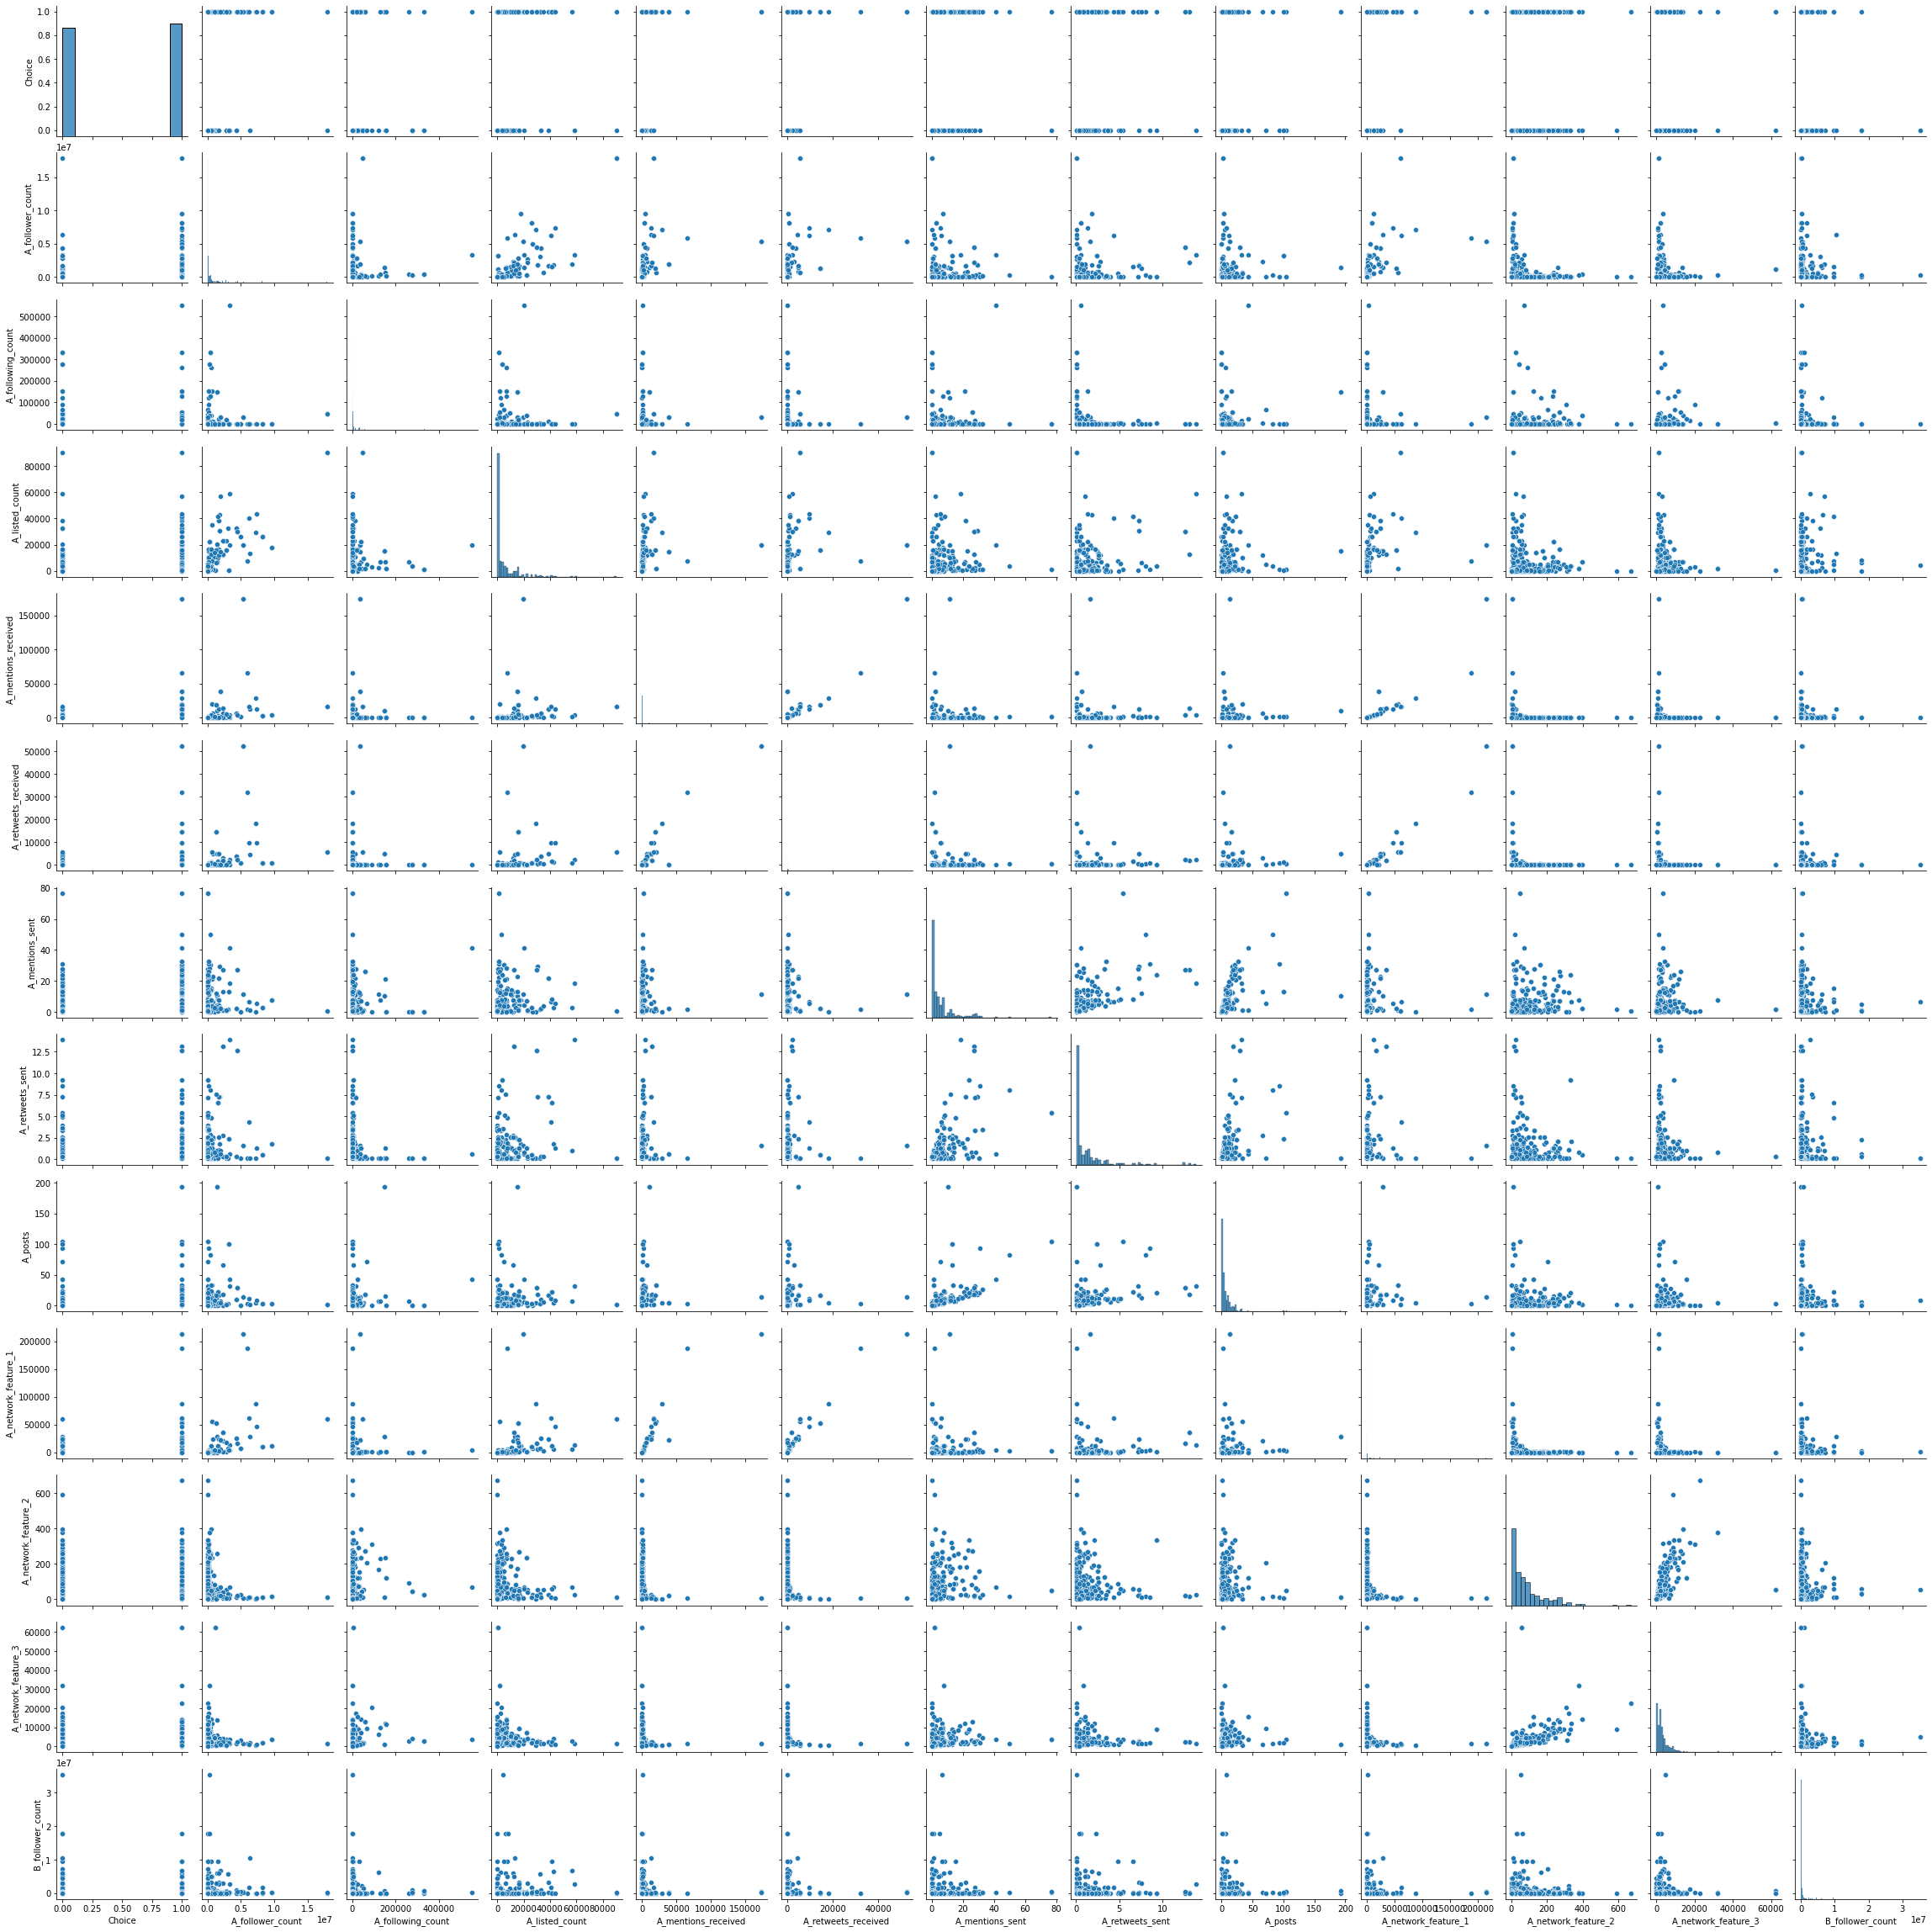

In [85]:
sns.pairplot(df_inf.iloc[ 1:500 , :13 ])

____
![gh](https://miro.medium.com/max/1009/1*RKww7E3bI2YKr1Mww62skw.png)
## Problem #3 (5pts)
### connecting GitHub to Heroku


You should have a GitHub and Heroku account set up from the previous HW. 

The way this works is that Heroku deploys your web app to the world, so that anyone can use it, from the files you store at GitHub. This way it will work independent of you and your laptop. 

Making the connection between Heroku and GitHub is a little tricky, and we will do that next week. For this week, I just want to you start thinking about how this works. 

✍🏻 Watch these two videos and write in a markdown cell the steps you will follow next week. For example, what is a `requirements.txt` file and where should it be? 

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nJHrSvYxzjE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.7/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/kXvmqg8hc70" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

✏️**Answer 3**:
* Steps to follow -
    * ***Requirements.txt*** file to store all the packages required by our application. Heroku installs these packages using the requirements.txt file (pipreqs ./ in cmd)
    * ***Setup*** and ***proc*** file to tell heroku the commands needed to start the application. setup.sh and Procfile without extension
    * Creating git repository in the application folder and logging in the heroku account using heroku CLI ( heroku ps:scale web=1 ,to make it free)
    * All the files along with the git repository we are creating should reside in the same folder as the application

____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it? 
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have? 
4. define "missingness", 
5. what are the three main types of missingness?
6. how is multiple imputation implemented? 
7. what is mean substitution, and what can go wrong? 
8. what is regression substitution, and what does it miss? 
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR 


✏️ **Answer 4**:
1. Imputation is the process of replacing missing data with a substitute data in the dataset. It helps in preserving all cases (rows) by replacing missing data by an estimate value based on method chosen.
2. Listwise deletion means deletion of all the cases with a missing value in the dataset. And two potential problems associated with it are:
    * The effective sample size decreases after the deletion
    *  If the missingness is not random then deletion of data introduces bias in the dataset
3. Pairwise deletion is deleting a case when it is missing a variable required for a particular analysis, but including that case in analyses for which all required variables are present. While listwise deletion removes the entire row. The problem in pairwise deletion is the total number N (rows) for analyses is not consistent across.
4. Missingness is basically defining the way in which the data is missing. Is the missing data has some correlation to data present in other columns, or is it random. Missingness is defining such behaviour of datapoints
5. The three main types of missingness are:
    * MCAR - Missing completely at random
    * MAR - Missing at random
    * MNAR - Missing not at random
6. Multiple imputation is implemented by: **Imputation - Analysis - Pooling**
    * Creating m sets of imputed data of missing values using good imputation method 
    * Analysing m data sets to calculate by calculating mean and variance
    * As each set will be unique thus combining m sets of results to remove noise introduces randomness in the process, creating better imputated values
7. Mean substitution is substituting null value in a column by its mean value. Mean imputation can cause trouble especially in multivariate analysis as it attenuates any correlations involving the variable that are imputed
8. In regression substitution a regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where the value of that variable is missing. In other words, available information for complete and incomplete cases is used to predict the value of a specific variable. The problem with this method is that the imputed values fit perfectly along the regression line, as no error is considered while imputing values
9. Stochastic regression imputation adds a random error term to the predicted value thus solving the problem in regression substitution imputation. 
10. From best to worst - `Not missing at all!` 😄 > `MCAR` > `MAR` > `MNAR`


___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression). 

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots. 

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions". 

✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot. 
Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information. 

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do. 

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

✏️ **Answer 5**:
* $μ$ and $w$ are mean and standard deviation of a sample dataset. 
* Any changes in the value of $μ$ results in shifting of the entire curve on x axis, depending on which direction it was changed. If mean is decreased then the curve shifts left 
* If $w$ is increased the bell curve of gaussian distribution widens, representing widely distributed values, while if deviation is decreased the curves shape shrinks and the hight of the peak increases.  

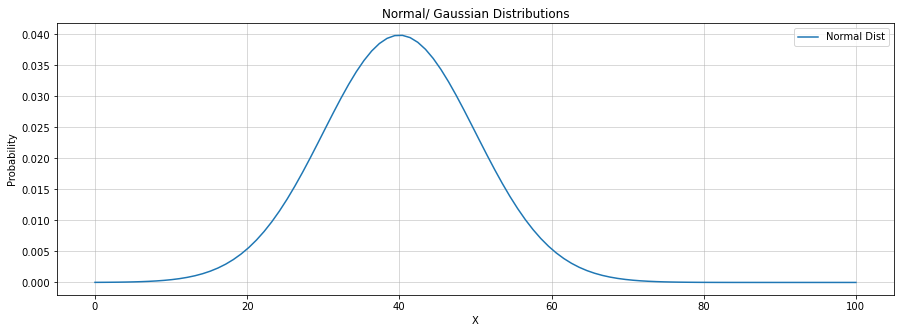

In [8]:
# Plotting gaussian distribution using multiple values of mean and standard deviation
x = np.linspace(0, 100, 100)
u = 40
w = 10

plt.figure(figsize=(15, 5)) 
plt.plot(x, np.exp(-(x - u)**2
                  / (2*w**2)) 
                  / (w*np.sqrt(2*np.pi)),
                  label=("Normal Dist")
        )

plt.grid(alpha=0.6)
plt.title("Normal/ Gaussian Distributions")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()

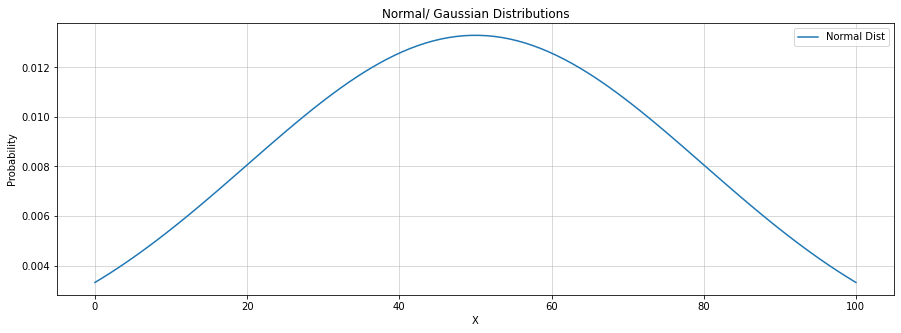

In [9]:
# When deviation has high value
u = 50
w = 30

plt.figure(figsize=(15, 5)) 
plt.plot(x, np.exp(-(x - u)**2
                  / (2*w**2)) 
                  / (w*np.sqrt(2*np.pi)),
                  label=("Normal Dist")
        )

plt.grid(alpha=0.6)
plt.title("Normal/ Gaussian Distributions")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()

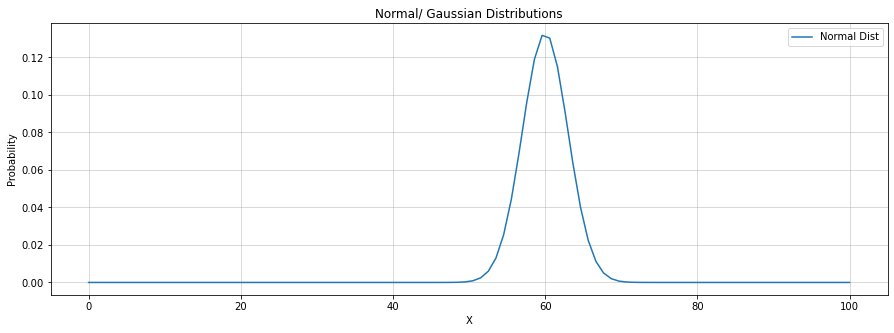

In [10]:
# When there is very little deviation from the mean
u = 60
w = 3

plt.figure(figsize=(15, 5)) 
plt.plot(x, np.exp(-(x - u)**2
                  / (2*w**2)) 
                  / (w*np.sqrt(2*np.pi)),
                  label=("Normal Dist")
        )

plt.grid(alpha=0.6)
plt.title("Normal/ Gaussian Distributions")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()

✏️ **Answer 5**
* $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are nothing but mean and standard deviations of attributes on x and y axis of the plot. To plot the graph in 2D we require two dimensions, and these variables control the mean and Std of those attributes in x and y dimension respectively.
* Surface plot try to provide a 3D view with an angled 2D graph visualization. The height or color intensity of the curve defines the probability density of the atributes in a dataset, while the peak value(x,y) in the curve shows the mean values of x and y attributes ($\mu_x$ and $\mu_y$).
* Contour plot on the other hand provides a top view of surface plot, where the center point inside the circles represent the mean for x and y attribute and the concentric circle represents the spread of the dataset along the axes
* Image plot is adding density function on top of contour plot, the color mapping signifies probability density values to understand the distribution between two attributes  

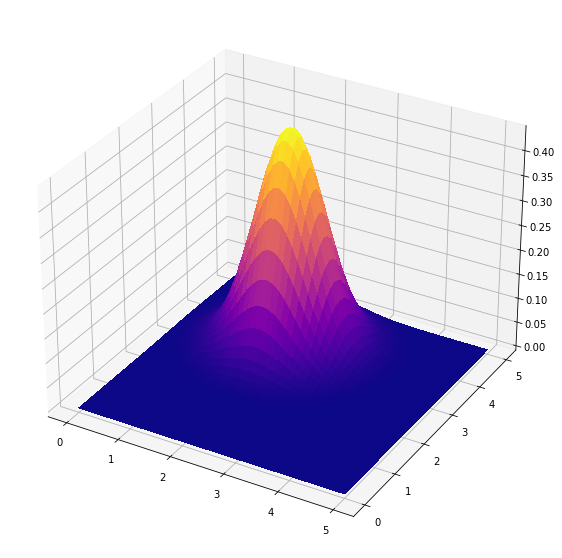

In [11]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) # Creating grid using x and y variables 

# Assigning values of mean and std for attributes at x and y axis
mx = 2
my = 3.5
wx = 0.6
wy = 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2)) / (wx*wy*2*np.pi) # Calculating gaussian probability
 
fig ,ax= plt.subplots(subplot_kw={"projection": "3d"}, figsize =(50, 10)) 
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)
# Code plt.subplots outputs two objects, one is a 3d projection figure which is stored in variable fig 
# And plot type ID <Axes3DSubplot:> stored is variable ax   
# .plot_surface is used to project meshgrid arrays X, Y with probability variable Z on to the figure ax

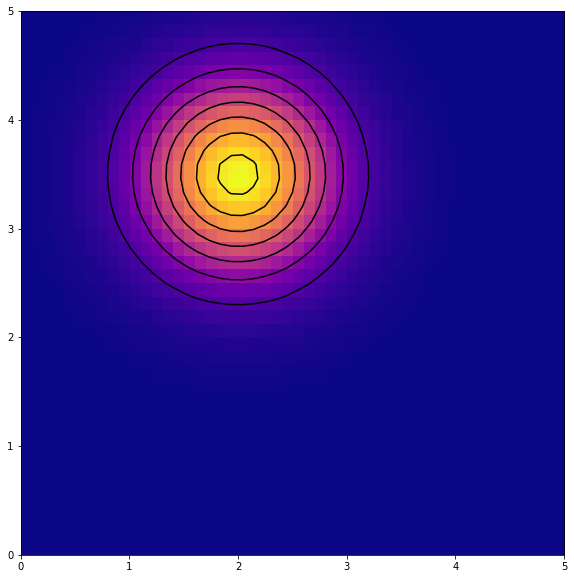

In [12]:
plt.figure(figsize=(50,10))
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma')

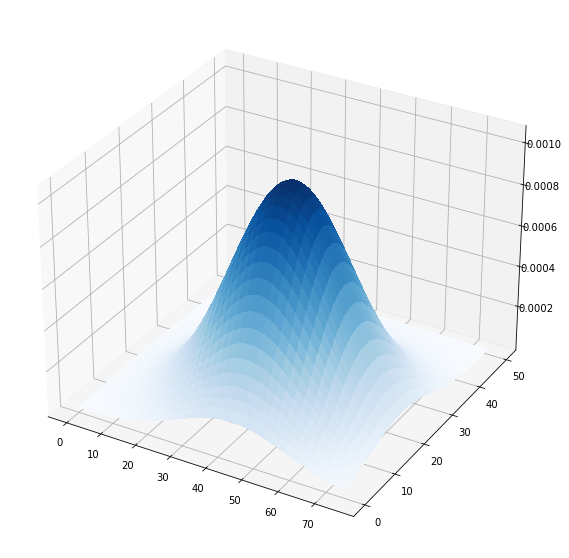

In [13]:
# Using different parameters
x = np.linspace(0, 75, 75)
y = np.linspace(0, 50, 50)
X, Y = np.meshgrid(x, y)

mx = 44
my = 19
wx = 15
wy = 10

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2)) / (wx*wy*2*np.pi)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize =(50, 10))
surf = ax.plot_surface(X, Y, Z, cmap="Blues", linewidth=0, antialiased=False)

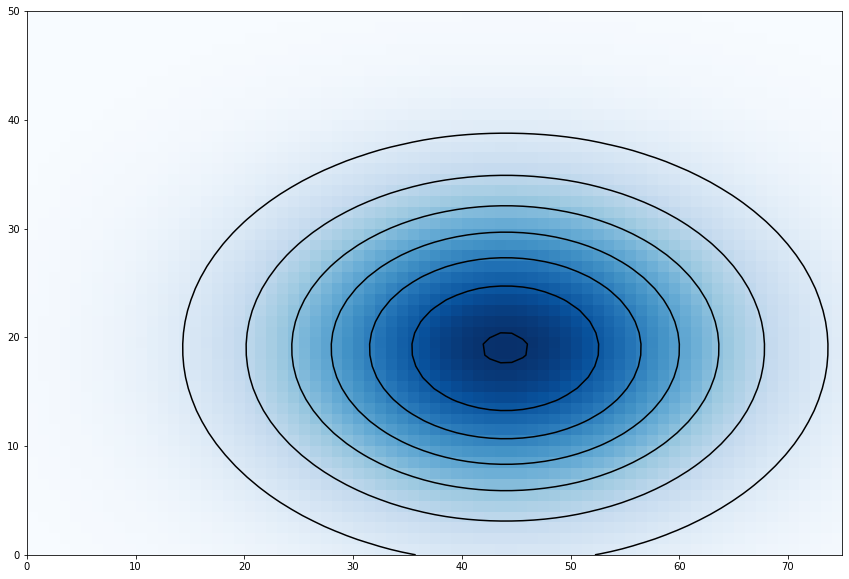

In [14]:
plt.figure(figsize=(50,10))
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 75, 0, 50], origin='lower', cmap='Blues')

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information? 

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

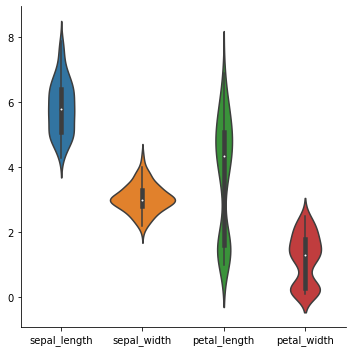

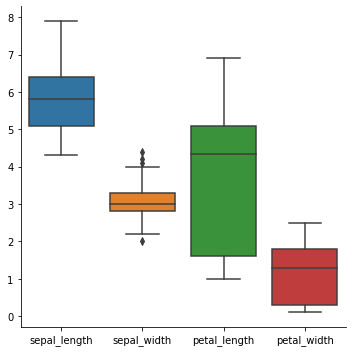

In [15]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

✏️ **Answer 6**:
* In violin plot 
    * The width of the violin shape define the density of the data points
    * The upper and lower ends in the violin plot signifies min and max value of the attribute 
    * Bar in the middle signifies IQR and white dot plots median value 
* In box plot 
    * The box resembles IQR and the horizontal line plots median value 
    * The points in sepal_width shows outliers and the verticle line resemble gamut of the attribute
* These plot gives a basic idea of how values of an attribute is distributed. They also help us to identify outliers 
* Both plot shows almost similar characterstics of a dataset, however a violin plot shows density and plots the entire column values and a box plot shows possible outliers. Therefore, both plot gives slightly different information hence, which one is better totally depends on the problem statement. 